# 理論

KNN 全名為 K-nearest neighbor。是一種監督式分類法，需要給定類別變數來做分類。 <br>
brute force方法先擺在最後面，先介紹比較特別的KNN種類。

KNN 類似決策樹，會以tree的資料型態做分類，但要注意，tree只是建構出來幫助我們分新資料，tree之枝葉並不一定就是分類結果。<br>
其長相如下：
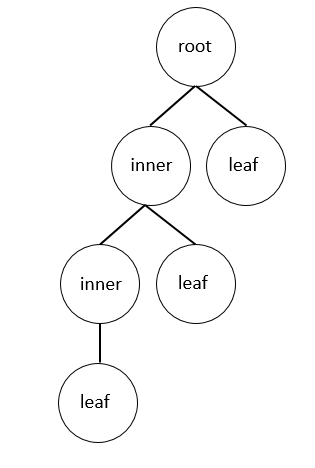

KNN 會依照下列兩個考量方式，建構出不一樣的tree形狀：

1. tree 的結構 (e.g. KD-tree or Ball-tree)
2. 如何決定leaf node (如何決定分枝)

# KD-tree

原名：k-dimensional tree

KD-tree 的枝葉生長方式為如下：<br>
假設資料集長相如下(已經過排序)

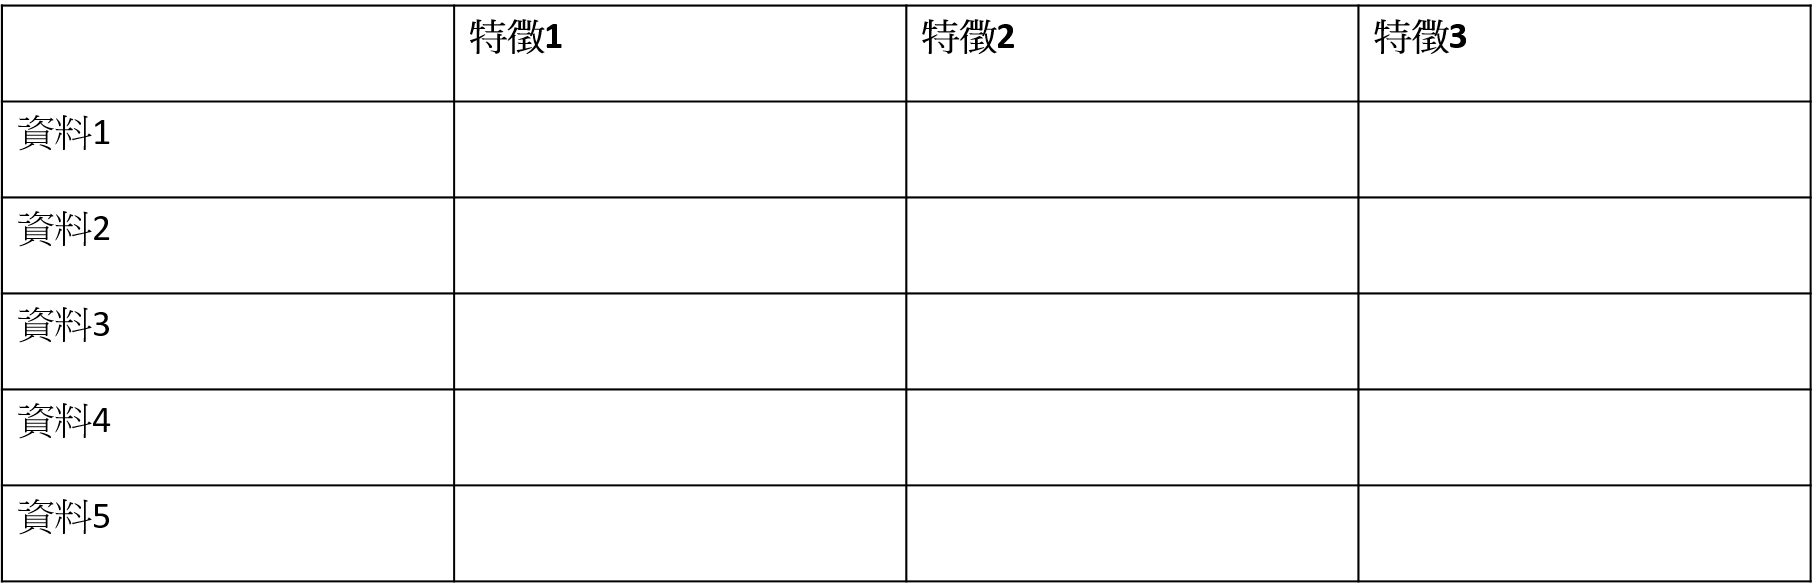

步驟1：針對特徵1將資料切成2類(可以用中位數、平均數等等來切開)

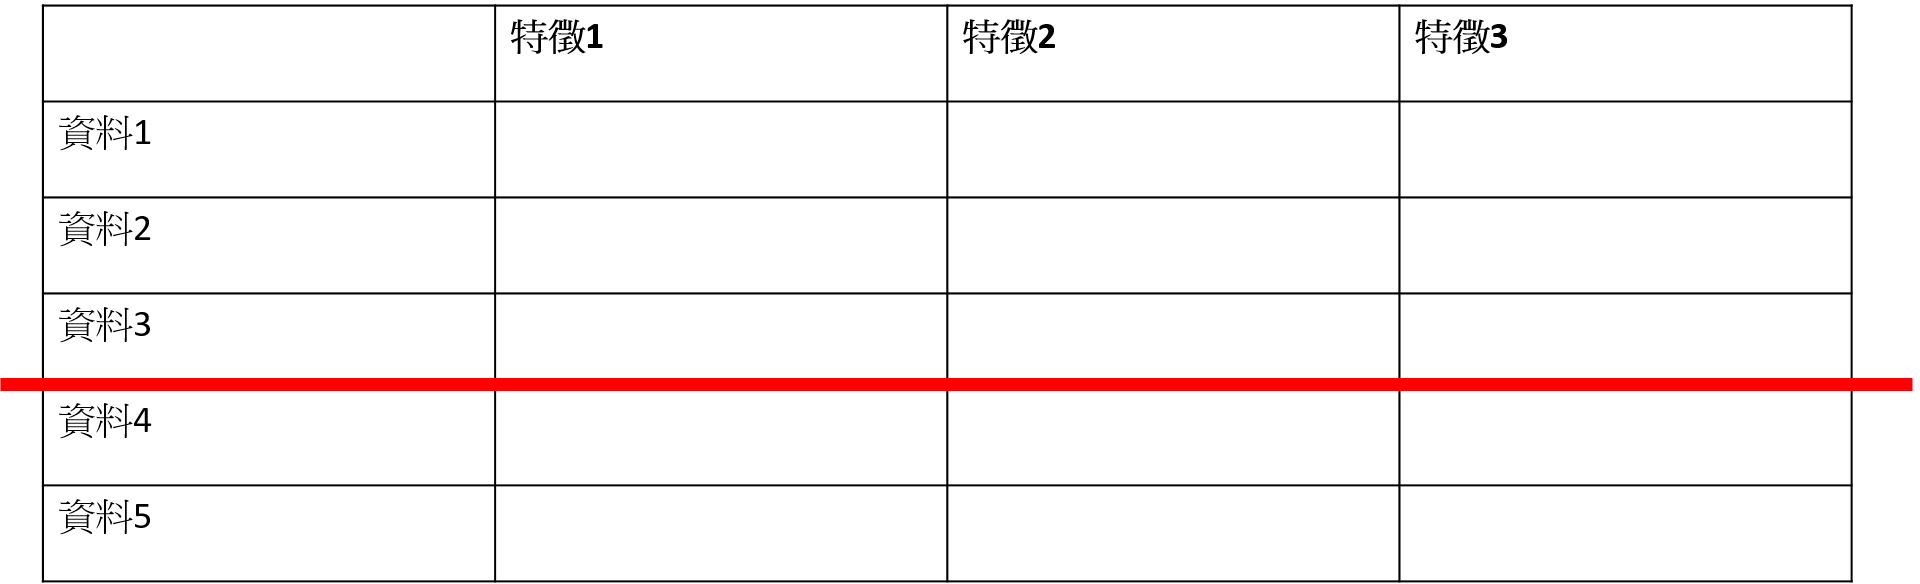

步驟2: 分出來的兩類，各自依照特徵2再切成2類(切完就會有4類)

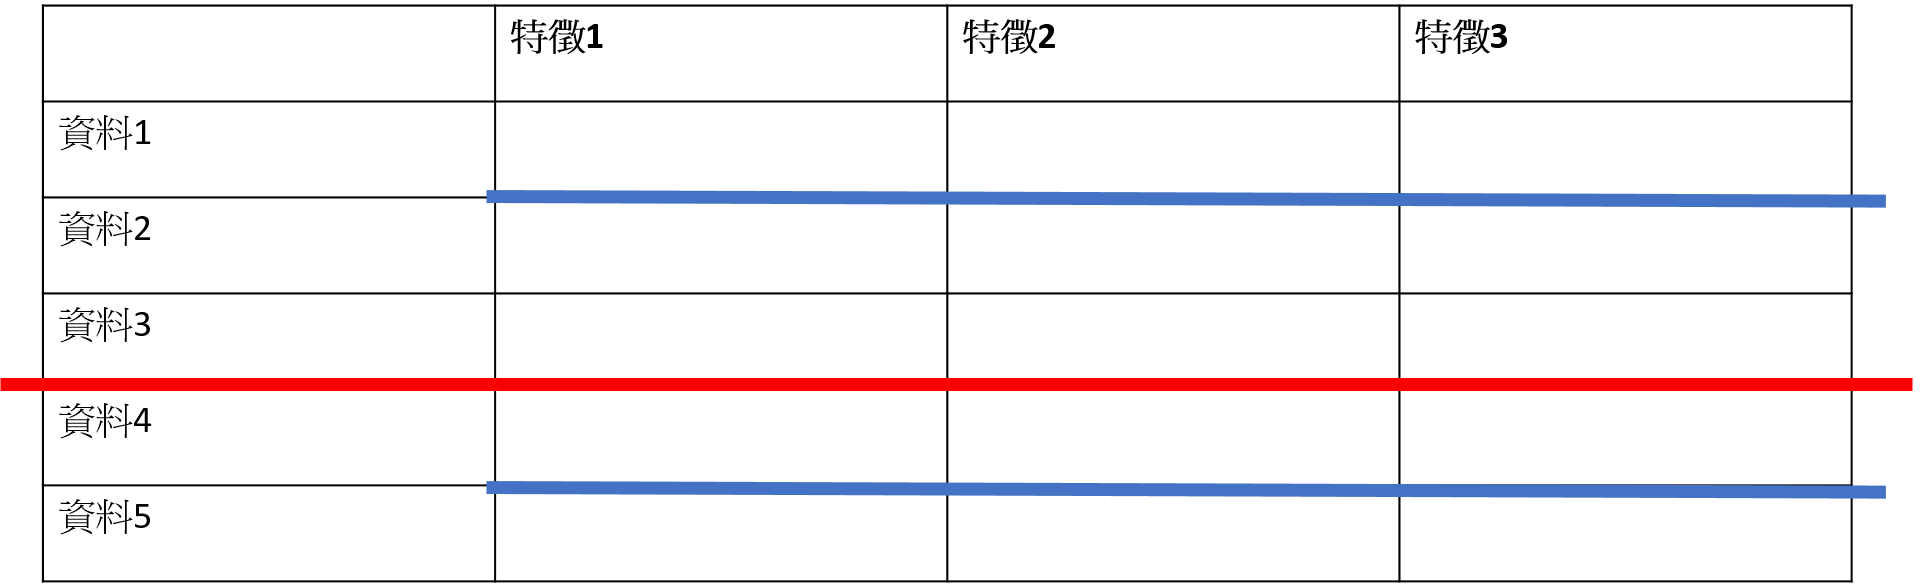

重複切，直到變成這樣

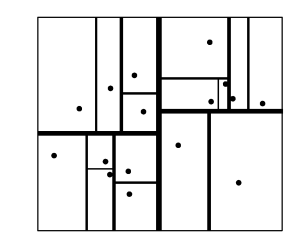

KD-tree優點：

直觀，因為是按照特徵來切

KD-tree缺點：

KD-tree像是線性分類，也就無法處理非線性分布的資料

# Ball-tree

ball-tree的架構須回到root-inner-leaf的圖片。 <br>
以下列演算法決定inner及leaf:

1. 首先由全部資料當作root
2. 決定其中一點當作圓心(通常是用質心,i.e. 平均)
3. 取出離圓心最遠的點$p_1$放在左半邊的inner node
4. 取出離$p_1$最遠的點$p_2$放在右半邊的inner node
5. 將所有點計算距離，離$p_1$近就放左半邊inner node，離$p_2$近就放右半邊inner node
6. 在左半邊inner node選質心，並重複3-5步；在右半邊inner node選質心，並重複3-5步。
7. 直到超過迭代次數，或是leaf內資料個數少於某個值之後即結束。

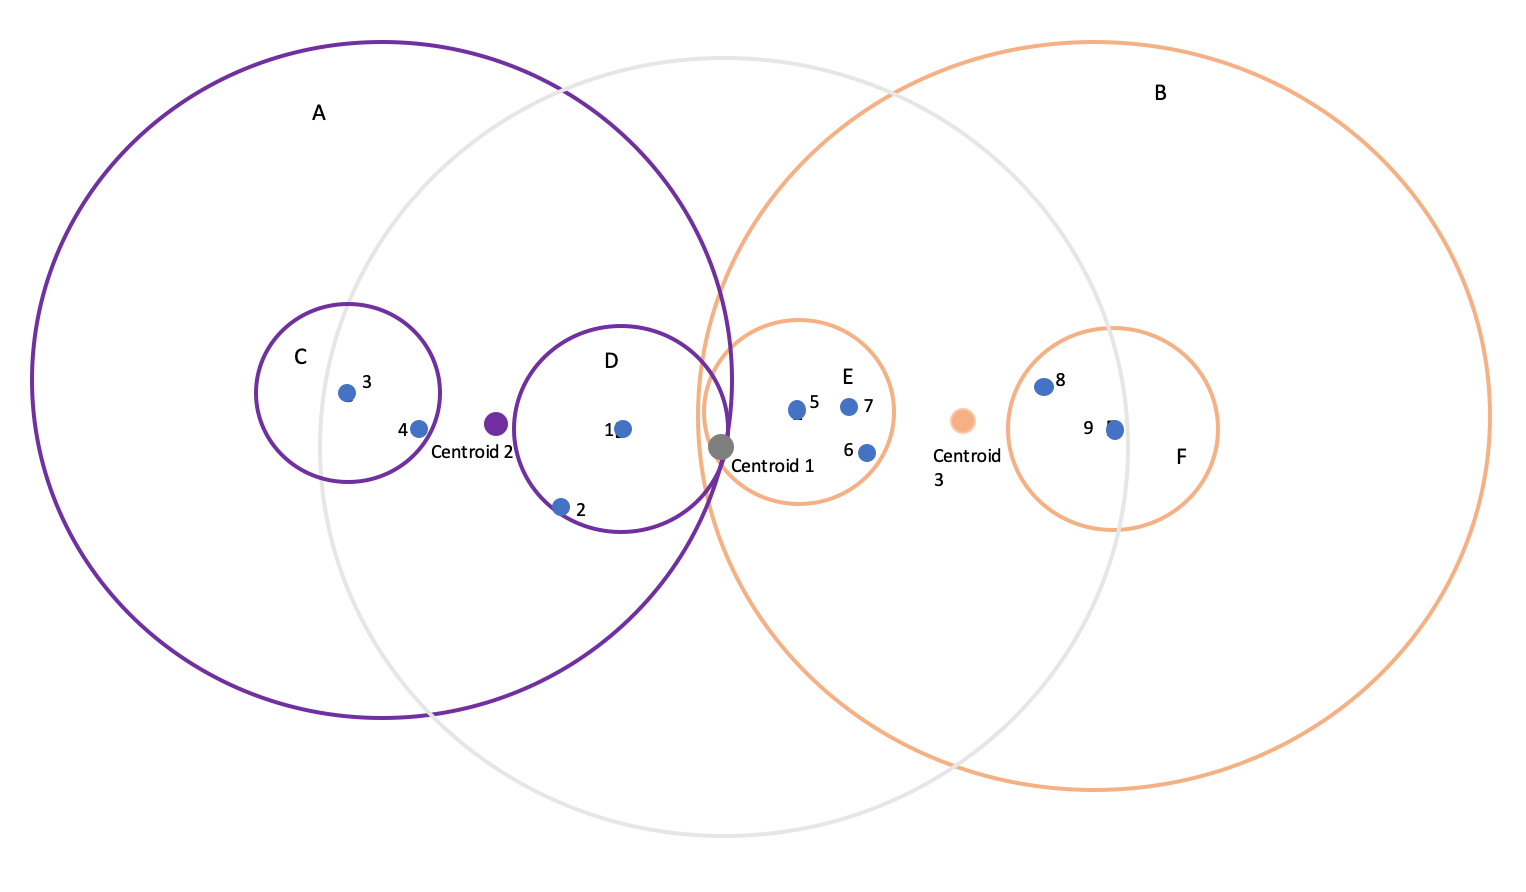

ball-tree 優點：

比KD-tree更能處理較為特殊之結構，像是稀疏資料，資料點落在遠比特徵數量維度還小的平面時。

ball-tree 缺點：

從第2步驟可以看出，ball-tree會受到離群值的影響。

至於選擇方法之其餘因素，參考scikit-learn 網站[1.6.4.4. Choice of Nearest Neighbors Algorithm](https://scikit-learn.org/stable/modules/neighbors.html)

# 最終步驟

當新資料進來後，根據離資料最近的K個點之分類，以多數決決定此資料之類別。<br>
brute force會直接計算所有點跟新資料點之距離，取出K個點出來。<br>
KD-tree 跟 ball-tree則是利用上述建構出之tree的架構來加速取出k個靠近的點。

# 程式

In [2]:
import numpy as np
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [22]:
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier 參數解釋：

KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, <br>
                     p=2, metric='minkowski', metric_params=None, n_jobs=None)

n_neighbors : 指的是KNN 的 K <br>
weights : 表示選取質心時是用怎樣的平均方式 <br>
可以選擇 {‘uniform’, ‘distance’}, callable or None, default=’uniform’<br>
uniform: 每個點用同樣權重計算<br>
distance : 距離越遠的點權重越小 i.e. 權重跟距離成反比<br>
callable : 自定義一個可以被call的函數<br>
none代表什麼都不用輸入，直接用預設<br>
<br>
algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’<br>
選擇樹的形狀<br>
auto 是讓程式自己判斷要用哪個，通常小資料都是brute force<br>
ball-tree 跟 kd_tree對應上述之講解<br>
<br>
leaf_size：當BallTree or KDTree當中的leaf node小於此值時結束迭代。 (如果此值越小，則計算次數會比較多，會花較多時間)<br>
<br>
metric: 距離函數，程式預設為$L_p$ norm (或稱Minkowski norm)，可自定義一個callable函數

p=2: 預設使用歐式距離

n_jobs: 設定平行運算之參數，指定多少個CPU進行運算，預設(None也是)是-1，也就是全部都用。

In [4]:
neigh_1 = KNeighborsClassifier(n_neighbors=2,algorithm = 'ball_tree')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('C:/Users/2022080101/Desktop/dfdata_補值.csv',encoding = 'big5')

In [31]:
data

,公司碼,財報年月,A104,A105,A106,A109,A111,A115,A116,A140,...,XPYR,財報年月_r$,產業碼,產業名,year,上市板塊,是否違約,原因,delete,市場年度
0,2,2014-12-01,16.15,29.94,14.65,13.25,28.67,3.83,69.29,4.18,...,0.0,2014-12-01,25A,建設,2014,主板,0,NaN,0,2015
1,2,2015-12-01,20.71,28.66,14.50,13.43,8.31,4.88,63.30,5.00,...,0.0,2015-12-01,25A,建設,2015,主板,0,NaN,0,2016
2,2,2016-12-01,19.16,28.90,14.23,11.89,16.60,4.17,63.86,4.70,...,0.0,2016-12-01,25A,建設,2016,主板,0,NaN,0,2017
3,2,2017-12-01,20.92,33.71,18.75,15.49,34.28,3.92,77.07,4.51,...,0.0,2017-12-01,25A,建設,2017,主板,0,NaN,0,2018
4,2,2018-12-01,23.06,37.14,22.77,16.74,11.42,4.02,72.33,4.88,...,0.0,2018-12-01,25A,建設,2018,主板,0,NaN,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10978,603998,2018-12-01,7.47,74.12,7.96,7.75,17.10,5.57,108.79,5.05,...,0.0,2018-12-01,17C1,西藥,2018,主板,0,NaN,0,2019
10979,603998,2019-12-01,5.25,72.94,7.09,7.37,15.17,3.74,54.09,3.72,...,0.0,2019-12-01,17C1,西藥,2019,主板,0,NaN,0,2020
10980,603999,2017-12-01,3.77,31.08,3.77,14.22,10.63,3.30,682.86,0.66,...,0.0,2017-12-01,99F,平媒電子報,2017,主板,0,NaN,0,2018
10981,603999,2018-12-01,1.71,26.75,1.66,7.67,17.90,1.50,734.94,-0.60,...,0.0,2018-12-01,99F,平媒電子報,2018,主板,0,NaN,0,2019


In [7]:
data_new = data.fillna(0)

In [32]:
data_new.iloc[:,2:20]

,A104,A105,A106,A109,A111,A115,A116,A140,A143,A144,A145,A175,A401,A509,A511,A517,A519,A51A
0,16.15,29.94,14.65,13.25,28.67,3.83,69.29,4.18,81.80,22.05,22.43,237.53,9.03,101.74,0.0,1.08,101.74,210.95
1,20.71,28.66,14.50,13.43,8.31,4.88,63.30,5.00,82.86,20.01,20.38,217.44,31.97,113.69,0.0,0.97,113.69,243.03
2,19.16,28.90,14.23,11.89,16.60,4.17,63.86,4.70,86.40,18.79,19.27,243.29,23.41,144.92,0.0,0.97,144.92,185.00
3,20.92,33.71,18.75,15.49,34.28,3.92,77.07,4.51,88.04,24.71,25.52,352.86,0.73,189.57,0.0,1.69,189.57,125.98
4,23.06,37.14,22.77,16.74,11.42,4.02,72.33,4.88,97.46,27.72,28.71,381.06,22.60,215.13,0.0,2.78,215.13,118.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10978,7.47,74.12,7.96,7.75,17.10,5.57,108.79,5.05,82.58,9.49,13.77,45.64,44.12,20.67,0.0,0.54,20.67,571.86
10979,5.25,72.94,7.09,7.37,15.17,3.74,54.09,3.72,71.65,9.82,14.84,64.29,4.13,27.70,0.0,1.04,27.70,350.31
10980,3.77,31.08,3.77,14.22,10.63,3.30,682.86,0.66,17.82,14.34,17.66,33.61,1.87,1.16,0.0,0.09,1.16,3958.09
10981,1.71,26.75,1.66,7.67,17.90,1.50,734.94,-0.60,-29.16,7.99,11.29,33.11,-5.55,0.95,0.0,0.12,0.95,6587.18


In [34]:
data_new['A511'].sum()

28543.58

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_new.iloc[:,2:20],
                                                    data_new.iloc[:, -4],
                                                    test_size=0.3,
                                                    random_state=42)

In [9]:
neigh_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

In [10]:
result = neigh_1.predict(X_test)

In [11]:
sum(result == y_test) / len(result)

0.987556904400607

In [12]:
sum(result)

2

In [15]:
knn_per_k = [KNeighborsClassifier(n_neighbors=k,algorithm = 'ball_tree').fit(X_train,y_train)
                for k in range(1, 10)]
acc = [model.score(X_test,y_test) for model in knn_per_k]

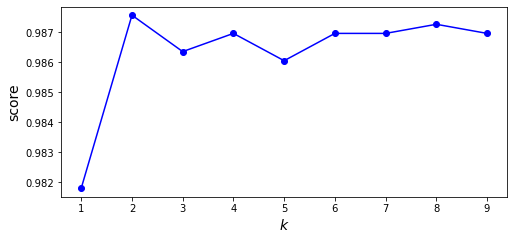

In [21]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), acc, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("score", fontsize=14)

plt.show()

In [27]:
y_pred_1 = knn_per_k[0].predict(X_test)

In [29]:
confusion_matrix(y_test, y_pred_1)
#[y_test=0,y_pred=0,    y_test=0,y_pred=1
# y_test=1,y_pred=0,    y_test=1,y_pred=1]

array([[3235,   21],
       [  39,    0]], dtype=int64)

In [30]:
confusion_matrix(y_test, knn_per_k[1].predict(X_test))

array([[3254,    2],
       [  39,    0]], dtype=int64)

# 參考資料

[1]  [Scikit-learn NN](https://scikit-learn.org/stable/modules/neighbors.html) <br>
[2]  [Scikit-learn KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit) <br>
[3]  [Ball-tree vs KD-tree](https://zhuanlan.zhihu.com/p/463709019) <br>
[4]  [Ball-tree vs KD-tree (2)](https://www.zhihu.com/question/30957691) <br>
[5]  [KNN without sklearn](https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c)